## Cupoy官網新聞

## TARGET 1
透過開發者⼯工具觀察網站在列列出 News Feed 這邊是屬於動態網站還是靜態網站，或是有 API 可以直接送 requests

## TARGET 2
根據網站特性選擇 requests / BeautifulSoup / selenium 等⼯工具進⾏行行爬蟲整理理

## TARGET 3
整理理成 pandas.DataFrame 後做簡單的統計可以⽤用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

## 以科技新聞為例，先連結到科技新聞網頁，複製其URL。

In [4]:
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  #科技新聞

## 用Selenium打開一個瀏覽器，連結到網站。然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。


In [19]:
browser = webdriver.Chrome(executable_path='C:/Users/bigdiau/Desktop/chromedriver_win32/chromedriver.exe')
browser.get(Cupoy_url)  # 打開瀏覽器並連到Cupoy科技網頁
time.sleep(5)

#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
count = 1
max_count = 500
categorylist = []
titlelist = []
contentlist = []
hreflist = []
while (count <= max_count) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、內容、來源、網址抓下來
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        content = artical.find('p', class_ = 'sc-FQuPU sc-ciodno bvnzOw').text
        href = artical.find("a").get('href')
        
        # 防止爬到重複的文章
        if title not in titlelist:
            # 將各資料存進list以供後續分析
            categorylist.append(category)
            titlelist.append(title)
            contentlist.append(content)
            hreflist.append(href)
            # count表文章爬到的數目
            count += 1
        
        # 停止條件，抓到500篇文章即終止程式
        if count == (max_count + 1):
            break
    
    # 將網頁繼續向下滑
    time.sleep(1)
    browser.execute_script("window.scrollTo(0, 1000000);")
browser.close()

In [20]:
# 整理資料後顯示
from pandas import DataFrame
columnName = ['category','title','content','href']

data = DataFrame([categorylist, titlelist, contentlist, hreflist])
data = data.T
data.columns = columnName
data

,category,title,content,href
0,Google專區,Apple 和 Google 將合作開發武漢肺炎接觸史追蹤技術 | TechNews 科技新報,蘋果（Apple）近日對外發布新聞資料，正式宣佈將合 Google 攜手合作，運用藍牙技術協...,https://technews.tw/2020/04/11/apple-and-googl...
1,Google專區,Apple 和 Google 攜手合作，開發藍牙追蹤技術查明新冠患者接觸史,新冠疫情如此難以控制，最重要的因素是其潛伏期太長，而且病癥病狀各異，甚至有患者毫無病癥，不自...,https://chinese.engadget.com/chinese-2020-04-1...
2,AI與大數據,谷歌開源Neural Tangents：簡單快速訓練無限寬度神經網絡 | 機器之心,無限寬的神經網絡可以訓練了？神經正切核果然可以發揮作用了。,https://www.jiqizhixin.com/articles/2020-04-11-5
3,AI與大數據,參賽3年，斬獲6金3銀2銅：Kaggle Grandmaster親授實戰經驗 | 機器之心,這是Kaggle 你問我答 (AMA) 第五期活動。本期的嘉賓是詹金，現就職於 DataRo...,https://www.jiqizhixin.com/articles/2020-04-11-4
4,AI與大數據,瑞德西韋用藥結果在NEJM發佈：重症死亡率13%，近半數重症患者已出院 | 機器之心,53 例重症患者接受了瑞德西韋「同情用藥」，最終 68% 的患者情況得到改善，47% 的患者...,https://www.jiqizhixin.com/articles/2020-04-11-3
...,...,...,...,...
495,AI與大數據,清華大學AI抗 “疫” 成果大盤點：風險自測、智能篩查、知識疫情…… | 機器之心,在全民抗疫的背景下，清華大學計算機系利用科技攻關幫助控制疫情，一系列 AI 抗“疫”成果落地...,https://www.jiqizhixin.com/articles/2020-03-23-2
496,AI與大數據,第4講：使用KubeFATE部署生產環境的聯邦學習Kubernetes集羣（視頻回放與精選問...,第4期主要介紹基於Kubernetes構建FATE聯邦學習環境。,https://www.jiqizhixin.com/articles/2020-03-23
497,AI與大數據,CVPR 2020 | 家居自動設計有多遠？針對語言描述的自動三維場景設計算法 | 機器之心,本文是對論文《Intelligent Home 3D: Automatic 3D-House...,https://www.jiqizhixin.com/articles/2020-03-20-8
498,AI與大數據,【新冠病毒全球疫情衛星監測系統 】項目詳細介紹 | 機器之心,“新冠病毒肺炎全球疫情衛星監測系統”是一款在底層架構上融合了衛星遙感、地圖服務和搜索引擎等技...,https://www.jiqizhixin.com/articles/2020-03-22-8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
0    27 non-null object
1    27 non-null int64
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes
None


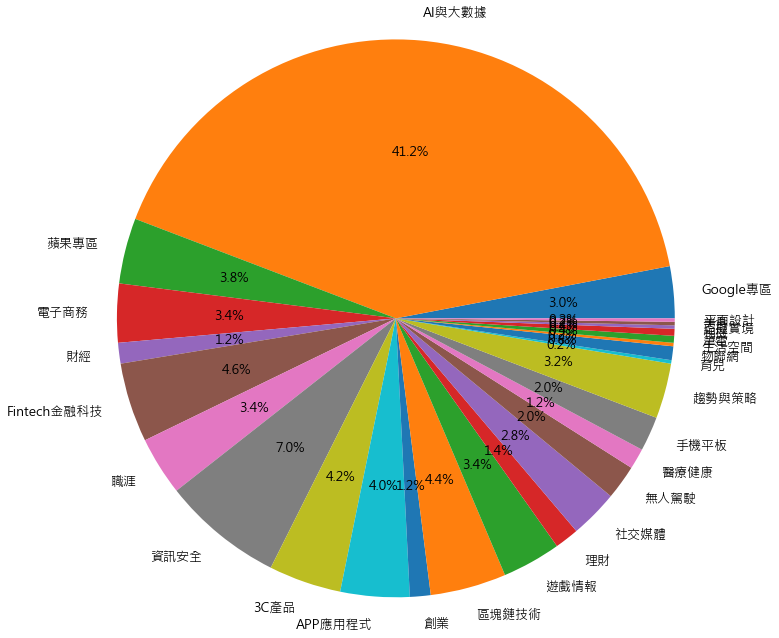

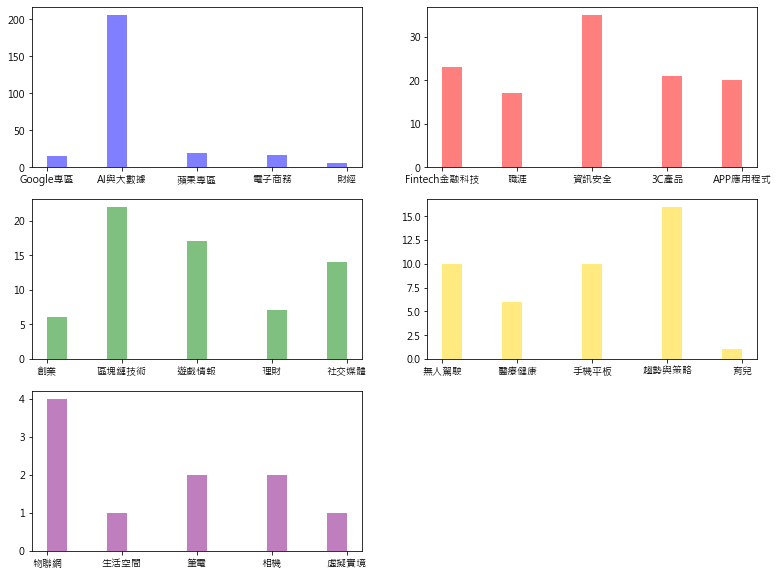

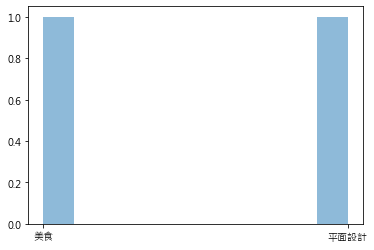

In [23]:
# 用Counter計算種類後排序顯示
from collections import Counter
import matplotlib.pyplot as plt

sourceDict = dict(Counter(categorylist))
categoryDf = DataFrame(list(sourceDict.items()))
print(categoryDf.info())

# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
#plt.title('新聞種類分布', fontsize = '25')
labels = categoryDf[0]          # 製作圓餅圖的類別標籤
size = categoryDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()

histshow_num = 5
histfigure_num_x = 3
histfigure_num_y = 2
# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 
         'orange', 'm', 'teal', 'rosybrown', 'olive', 
         'c', 'navy', 'thistle', 'palegreen', 'pink', 'turquoise'
         'y', 'chocolate', 'grey', 'crimson', 'darkcyan']
plotlist = []
plt.figure(figsize = (13,int(len(categoryDf)/2)-histfigure_num_x))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % histshow_num == 0:
        plt.subplot(histfigure_num_x, histfigure_num_y, int(count/histshow_num))
        plt.hist(plotlist, alpha=0.5, bins = 15, color=color[int(count/histshow_num-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()